In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [12]:
# load behavior data and state activity data
homeDir = "D:/BU/ChandLab/PsychRNN/"
archiveDir = "D:/BU/ChandLab/PsychRNNArchive/"
stateActivity = np.load( archiveDir + "stateActivity/stateActivityBasic2InputNoise0.5.npy",allow_pickle='TRUE').item()
checker_df = pd.read_csv(homeDir + "resultData/basic2InputNoise0.5.csv")

In [16]:
checker_df.head()

,Unnamed: 0,trial,coherence,coherence_bin,green_side,correct_side,target_onset,checker_onset,decision,green_decision,decision_time,correct_decision
0,0,0,-0.607436,-0.6,1.0,0.0,329.0,868.0,0.0,0,263.0,1
1,1,1,-0.168000,-0.2,0.0,1.0,299.0,969.0,1.0,0,582.0,1
2,2,2,-0.872420,-0.9,0.0,1.0,398.0,856.0,1.0,0,176.0,1
3,3,3,0.281077,0.3,0.0,0.0,313.0,820.0,0.0,1,557.0,1
4,4,4,0.516636,0.5,1.0,1.0,304.0,860.0,1.0,1,386.0,1


In [90]:
state = stateActivity["state"][:,25:300,:]
y = stateActivity["y"]
RT = checker_df["decision_time"]
choice = checker_df["decision"]

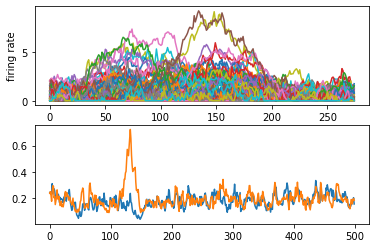

In [91]:
trialNum = 5
plt.figure()
plt.subplot(211)
_ = plt.plot(state[trialNum,:,:])
plt.xlabel("time step (10ms)")
plt.ylabel("firing rate")
plt.subplot(212)
_ = plt.plot(y[trialNum,:,:])


In [92]:
# reshape state matrix to: (#units, #timestep, #trials)
temp = np.transpose(state, (2,1,0))
# combine the 1st and 2nd dimension together: (#units, #timestep * #trials)
temp2 = np.reshape(state, (temp.shape[0], temp.shape[1]*temp.shape[2]))
# transpose temp2 to be n components * n features
temp2 = np.transpose(temp2)

In [93]:
# conduct pca
from sklearn.decomposition import PCA

# pca = PCA(n_components=temp2.shape[1])
pca = PCA(0.95)
pca.fit(temp2)
orthState = pca.transform(temp2)

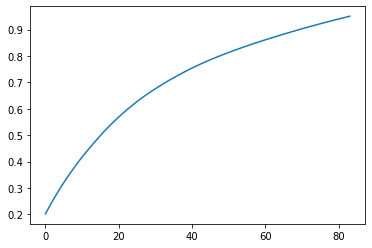

In [95]:
_ = plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [94]:
a, b, c = state.shape
test = np.transpose(orthState)
latent = np.zeros((test.shape[0],b,a))
for i in range(state.shape[0]):
    latent[:,:,i] = test[:, np.arange(0,b) + (i - 1)*b]
    

In [96]:
left = latent[:,:, choice == 0]
leftAve = np.sum(left, axis = 2)
right = latent[:,:,(choice == 1)]
rightAve = np.sum(right, axis = 2)


<IPython.core.display.Javascript object>


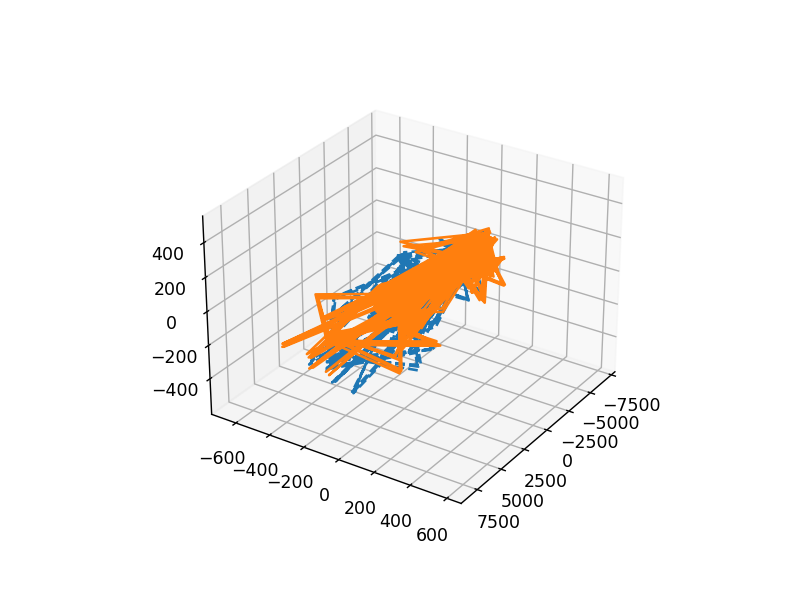

In [107]:
%matplotlib notebook

fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
ax.plot3D(leftAve[0,:], leftAve[1,:], leftAve[2,:], '--')
ax.plot3D(rightAve[0,:], rightAve[1,:], rightAve[2,:], '-')


ax.view_init(45, 45)

plt.show()

In [72]:
restore = pca.inverse_transform(orthState)

In [73]:
restore = np.transpose(restore)

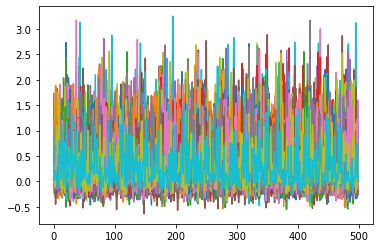

In [78]:
restoreData = np.zeros((100,500,5000))

for i in range(5000):
    restoreData[:,:,i] = restore[:, np.arange(0,500) + (i - 1)*500]
    
_ = plt.plot(np.transpose(restoreData[:,:,5]))

In [76]:
len(np.arange(0,500))

500